In [3]:
import pandas as pd
import numpy as np
from tslearn import barycenters
import matplotlib.pyplot as plt

# Euclidean Barycenter Averaging

## Real Power 

In [4]:
time_series = [[1, 2, 3, 4], [1, 2, 4, 5]] #each list is a column in my data
bar = barycenters.euclidean_barycenter(time_series)
bar.shape

(4, 1)

In [22]:
time_series[1]

[1, 2, 4, 5]

In [5]:
tstmp = np.array(time_series).T
dt_idx = pd.date_range(start="2/02/2016 8:00",freq="15 min",periods=4)


,X1,X2
2016-02-02 08:00:00,1,1
2016-02-02 08:15:00,2,2
2016-02-02 08:30:00,3,4
2016-02-02 08:45:00,4,5


In [11]:
test_df = pd.read_csv("../data/subsequences/jan_mondays_P.csv")
test_df.rename(columns={'Unnamed: 0':'modified_index'}, inplace=True)
test_df.set_index('modified_index', inplace=True)
test_data_tranposed = test_df.to_numpy().T
test_data_ebc = barycenters.euclidean_barycenter(test_data_tranposed)
test_data_ebc_transposed = test_data_ebc.transpose()
test_data_with_ebc = np.append(test_data_tranposed,test_data_ebc_transposed, axis=0)
test_data_cols_mod = test_df.columns.to_list()
test_data_cols_mod.append('Euclidean Barycenter')
test_data_ebc_df = pd.DataFrame(test_data_with_ebc.T,columns=test_data_cols_mod)
test_data_ebc_df.set_index(test_df.index,inplace=True)

In [12]:
test_data_ebc_df.columns.to_list()[:-1]

['P-JW1-MON', 'P-JW2-MON', 'P-JW3-MON', 'P-JW4-MON']

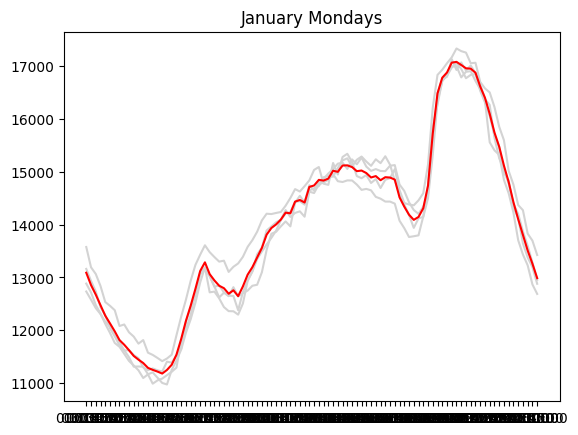

In [14]:
#TODO: Use the code below to properly format visualizations with all lines greyed except barycenter
# Create a list of the columns to plot
columns = ['JMON-1:P_TOTAL_SJN', 'JMON-2:P_TOTAL_SJN', 'JMON-3:P_TOTAL_SJN', 'JMON-4:P_TOTAL_SJN']

# Set the color of the lines to light grey
color = 'lightgrey'

# Plot the lines
for column in columns:
    plt.plot(test_data_ebc_df[column], color=color)

plt.plot(test_data_ebc_df['Euclidean Barycenter'],color='red')

# Set the title of the plot
plt.title('January Mondays')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


""" 
dtfmt_test_data_ebc_df = test_data_ebc_df.copy()
dtfmt_test_data_ebc_df.set_index(pd.to_datetime(test_data_ebc_df.index),inplace=True)

# Create a list of the columns to plot
columns = ['JMON-1:P_TOTAL_SJN', 'JMON-2:P_TOTAL_SJN', 'JMON-3:P_TOTAL_SJN', 'JMON-4:P_TOTAL_SJN']

# Set the color of the lines to light grey
color = 'lightgrey'

# Plot the lines
for column in columns:
    plt.plot(dtfmt_test_data_ebc_df[column], color=color)

ax = dtfmt_test_data_ebc_df.plot(['Euclidean Barycenter'],color='red')

df = dtfmt_test_data_ebc_df
tick_positions = range(len(df.index))
tick_labels = df.index.strftime('%H:%M')

# Set the tick positions and labels for the x-axis
plt.xticks(tick_positions, tick_labels)

# Set the title of the plot
plt.title('January Mondays')

# Show the plot
plt.show() 
"""




# Create a dataframe with a datetime index
df = pd.DataFrame({"value": [1, 2, 3, 4]})
df.index = pd.date_range("2023-05-19 00:00:00", freq='15 min',periods=4)


#TODO Fix plotting issue. Neeed to format x-axis in hours and minuts
#create the major formatter

#create the minor formatter

#set the major formatter

#set the minor formatter


# Plot the dataframe
ax = df.plot()
fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(fmt)

plt.show()


In [22]:
tmp = jan_mondays_ebcs.set_index(pd.to_datetime(jan_mondays_ebcs.index))

In [30]:
tmp['time'] = tmp['JMON-1:P_TOTAL_SJN'].index

TypeError: float() argument must be a string or a real number, not 'datetime.time'

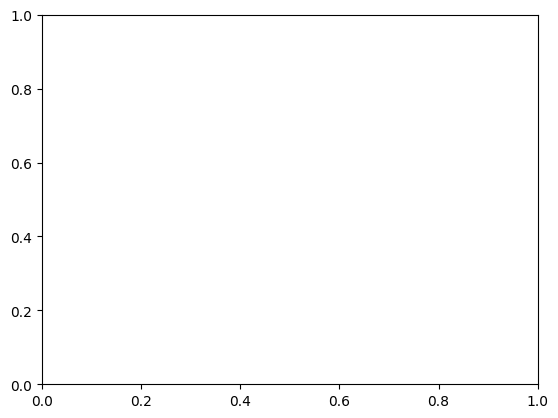

In [34]:
plt.plot(tmp['time'].dt.time,tmp['JMON-1:P_TOTAL_SJN'])

In [8]:
#TODO Write a function to take a dataframe(index-agnostic) and calculate the Euclidean Barycentric Average for all the variables in the df.

def get_ebc_from_df(df):
    ''''
    This assumes df has a column of the index which was auto set to 'Unnamed 0' as is the case
    when the user imports without explicitly specifying the date time column
    '''
    if df.columns.tolist()[0] == 'Unnamed: 0':
        df.rename(columns={'Unnamed: 0':'modified_index'}, inplace=True)
        df.set_index('modified_index', inplace=True)
    data_tranposed = df.to_numpy().T
    data_ebc = barycenters.euclidean_barycenter(data_tranposed)
    data_ebc_transposed = data_ebc.transpose()
    data_with_ebc = np.append(data_tranposed,data_ebc_transposed, axis=0)
    data_cols_mod = df.columns.to_list()
    data_cols_mod.append('Euclidean Barycenter')
    data_ebc_df = pd.DataFrame(data_with_ebc.T,columns=data_cols_mod)
    data_ebc_df.set_index(df.index,inplace=True)
    return data_ebc_df

In [9]:
def plot_highlighted_ebc(ebc_df,title):
    '''
    Highlights the euclidean barycenter in read compred to the rest of the variables(in grey)
    '''
    import matplotlib.pyplot as plt
    # Create a list of the columns to plot
    columns = ebc_df.columns.to_list()[:-1]

    # Set the color of the lines to light grey
    color = 'lightgrey'

    # Plot the lines
    for column in columns:
        plt.plot(ebc_df[column], color=color,xticks=range(0, len(df), 4), figsize=(16, 6),rot=45)

    plt.plot(ebc_df['Euclidean Barycenter'],color='red',xticks=range(0, len(df), 4), figsize=(16, 6),rot=45)

    # Set the title of the plot
    plt.title(title)

    # Show the plot
    plt.show()


In [10]:
# testing get_ebc_from_df()
jan_wk2_bc_df=  pd.read_csv("../data/clustering/jan_tuesdays.csv")
jan_wk2_bc = get_ebc_from_df(jan_wk2_bc_df)
#jan_wk2_bc.plot(xticks=range(len(jan_wk2_bc)))

AttributeError: Line2D.set() got an unexpected keyword argument 'xticks'

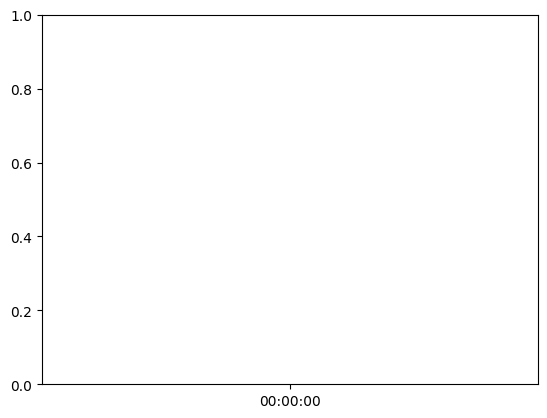

In [11]:
#testing plot_highlighted_ebc
plot_highlighted_ebc(jan_wk2_bc,'January Tuesdays')

In [5]:
#averaging January weekdays
jan_mondays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_mondays.csv"))
jan_tuesdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_tuesdays.csv"))
jan_wednesdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_wednesdays.csv"))
jan_thursdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_thursdays.csv"))
jan_fridays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_fridays.csv"))
jan_saturdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_saturdays.csv"))
jan_sundays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_sundays.csv"))


#averaging February weekdays
feb_mondays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/feb_mondays.csv"))
feb_tuesdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/feb_tuesdays.csv"))
feb_wednesdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/feb_wednesdays.csv"))
feb_thursdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/feb_thursdays.csv"))
feb_fridays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/feb_fridays.csv"))
feb_saturdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/feb_saturdays.csv"))
feb_sundays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_sundays.csv"))


#averaging all weekdays in January and february
jan_and_feb_mondays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_mondays.csv"))
jan_and_feb_tuesdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_tuesdays.csv"))
jan_and_feb_wednesdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_wednesdays.csv"))
jan_and_feb_thursdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_thursdays.csv"))
jan_and_feb_fridays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_fridays.csv"))
jan_and_feb_saturdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_saturdays.csv"))
jan_and_feb_sundays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_sundays.csv"))

#averaging weeks 1-4 in January
jan_wk1 = pd.read_csv('../data/clustering/jan_wk1.csv')
jan_wk2 = pd.read_csv('../data/clustering/jan_wk2.csv')
jan_wk3 = pd.read_csv('../data/clustering/jan_wk3.csv')
jan_wk4 = pd.read_csv('../data/clustering/jan_wk4.csv')

jan_wk1_ebcs = get_ebc_from_df(jan_wk1)
jan_wk2_ebcs = get_ebc_from_df(jan_wk2)
jan_wk3_ebcs = get_ebc_from_df(jan_wk3)
jan_wk4_ebcs = get_ebc_from_df(jan_wk4)

#averagnig weeks 1-3 in February
feb_wk1 = pd.read_csv('../data/clustering/feb_wk1.csv')
feb_wk2 = pd.read_csv('../data/clustering/feb_wk2.csv')
feb_wk3 = pd.read_csv('../data/clustering/feb_wk3.csv')

feb_wk1_ebcs = get_ebc_from_df(feb_wk1)
feb_wk2_ebcs = get_ebc_from_df(feb_wk2)
feb_wk3_ebcs = get_ebc_from_df(feb_wk3)

#averaging the month of January
jan_df = jan_wk1.join(jan_wk2).join(jan_wk3).join(jan_wk4)
jan_ebc = get_ebc_from_df(jan_df)

#averagnig the month of February
feb_df = feb_wk1.join(feb_wk2).join(feb_wk3)
feb_ebc = get_ebc_from_df(feb_df)


#averagnig january and february
jan_and_feb = jan_df.join(feb_df)
jan_and_feb_ecbs = get_ebc_from_df(jan_and_feb)

In [6]:
#storing averaeges for plotting later on
jan_mondays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_mondays.xlsx')
jan_tuesdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_tuesdays.xlsx')
jan_wednesdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_wednesdays.xlsx')
jan_thursdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_thursdays.xlsx')
jan_fridays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_fridays.xlsx')
jan_saturdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_saturdays.xlsx')
jan_sundays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_sundays.xlsx')
feb_mondays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_mondays.xlsx')
feb_tuesdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_tuesdays.xlsx')
feb_wednesdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_wednesdays.xlsx')
feb_thursdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_thursdays.xlsx')
feb_fridays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_fridays.xlsx')
feb_saturdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_saturdays.xlsx')
feb_sundays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_sundays.xlsx')
jan_and_feb_mondays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_mondays.xlsx')
jan_and_feb_tuesdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_tuesdays.xlsx')
jan_and_feb_wednesdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_wednesdays.xlsx')
jan_and_feb_thursdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_thursdays.xlsx')
jan_and_feb_fridays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_fridays.xlsx')
jan_and_feb_saturdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_saturdays.xlsx')
jan_and_feb_sundays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_sundays.xlsx')
jan_wk1_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_wk1.xlsx')
jan_wk2_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_wk2.xlsx')
jan_wk3_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_wk3.xlsx')
jan_wk4_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_wk4.xlsx')
feb_wk1_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_wk1.xlsx')
feb_wk2_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_wk1.xlsx')
feb_wk3_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_wk1.xlsx')
jan_ebc.to_excel('../data/clustering/euclidean barycenter averages/jan.xlsx')
feb_ebc.to_excel('../data/clustering/euclidean barycenter averages/feb.xlsx')
jan_and_feb_ecbs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb.xlsx')

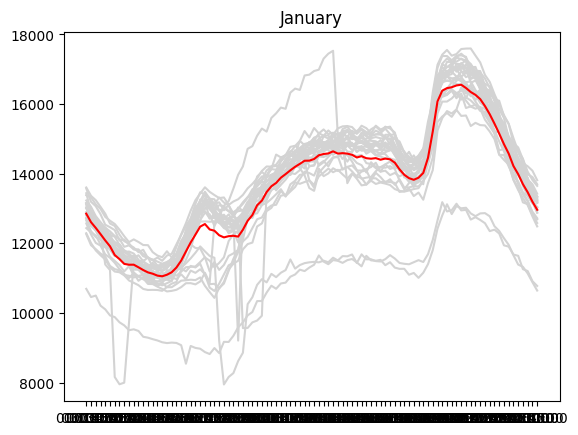

In [11]:
plot_highlighted_ebc(jan_ebc,'January')

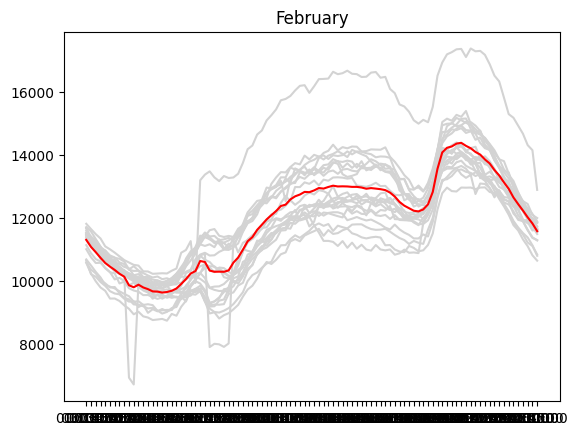

In [12]:
plot_highlighted_ebc(feb_ebc,'February')

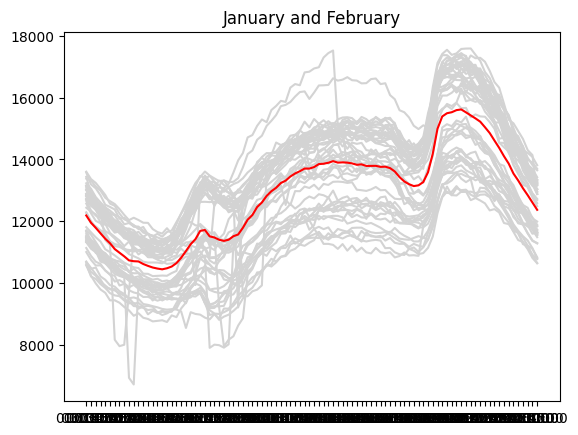

In [10]:
plot_highlighted_ebc(jan_and_feb_ecbs,'January and February')

In [53]:
tmp.index

DatetimeIndex(['2023-05-23 00:00:00', '2023-05-23 00:15:00',
               '2023-05-23 00:30:00', '2023-05-23 00:45:00',
               '2023-05-23 01:00:00', '2023-05-23 01:15:00',
               '2023-05-23 01:30:00', '2023-05-23 01:45:00',
               '2023-05-23 02:00:00', '2023-05-23 02:15:00',
               '2023-05-23 02:30:00', '2023-05-23 02:45:00',
               '2023-05-23 03:00:00', '2023-05-23 03:15:00',
               '2023-05-23 03:30:00', '2023-05-23 03:45:00',
               '2023-05-23 04:00:00', '2023-05-23 04:15:00',
               '2023-05-23 04:30:00', '2023-05-23 04:45:00',
               '2023-05-23 05:00:00', '2023-05-23 05:15:00',
               '2023-05-23 05:30:00', '2023-05-23 05:45:00',
               '2023-05-23 06:00:00', '2023-05-23 06:15:00',
               '2023-05-23 06:30:00', '2023-05-23 06:45:00',
               '2023-05-23 07:00:00', '2023-05-23 07:15:00',
               '2023-05-23 07:30:00', '2023-05-23 07:45:00',
               '2023-05-

## Reactive Power

I did not create subsequences from before, so I'll have to do that for Q now. I can take advantage of this to place all subsequencing code into one file.

# Discrete Time Warped Barycenter Averaging(DBA) Methods
I need to attempt the methods in a short time. This may not be feasible but it is critical to what I am doing and needs to be done to make this analysis substantial enough for a master's project.

In [13]:
test_df = pd.read_csv("../data/subsequences/jan_mondays_P.csv")
test_df.rename(columns={'Unnamed: 0':'modified_index'}, inplace=True)
test_df.set_index('modified_index', inplace=True)
# test_data_tranposed = test_df.to_numpy().T
# test_data_ebc = barycenters.euclidean_barycenter(test_data_tranposed)
# test_data_ebc_transposed = test_data_ebc.transpose()
# test_data_with_ebc = np.append(test_data_tranposed,test_data_ebc_transposed, axis=0)
# test_data_cols_mod = test_df.columns.to_list()
# test_data_cols_mod.append('Euclidean Barycenter')
# test_data_ebc_df = pd.DataFrame(test_data_with_ebc.T,columns=test_data_cols_mod)
# test_data_ebc_df.set_index(test_df.index,inplace=True)

In [14]:
test_df

,P-JW1-MON,P-JW2-MON,P-JW3-MON,P-JW4-MON
modified_index,,,,
00:00:00,3071.832,2951.033,2945.472,2906.976
00:15:00,2978.160,2902.292,2861.467,2888.302
00:30:00,2933.031,2857.068,2807.175,2839.926
00:45:00,2878.928,2797.825,2778.808,2819.625
01:00:00,2881.163,2741.989,2733.635,2773.748
...,...,...,...,...
22:45:00,3253.669,3212.808,3146.584,3190.377
23:00:00,3135.095,3119.631,3097.041,3088.021
23:15:00,3096.660,3015.111,2983.529,3070.956


In [64]:
len(var_1) == len(original_indicies)

True

<AxesSubplot: >

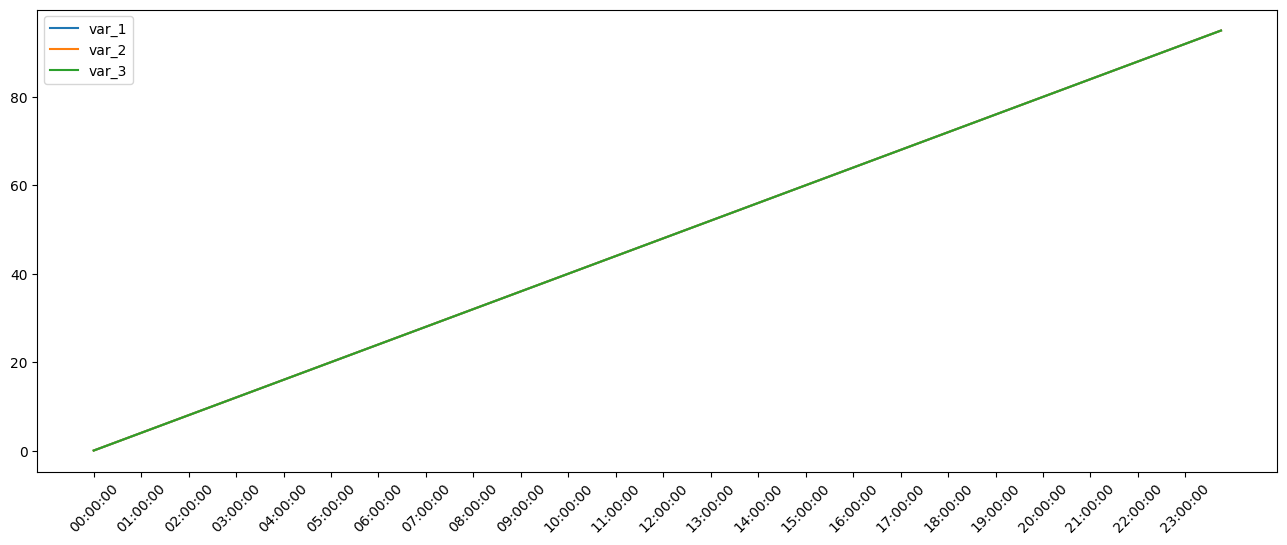

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


original_indicies = ['00:00:00', '00:15:00', '00:30:00', '00:45:00', '01:00:00', '01:15:00',
       '01:30:00', '01:45:00', '02:00:00', '02:15:00', '02:30:00', '02:45:00',
       '03:00:00', '03:15:00', '03:30:00', '03:45:00', '04:00:00', '04:15:00',
       '04:30:00', '04:45:00', '05:00:00', '05:15:00', '05:30:00', '05:45:00',
       '06:00:00', '06:15:00', '06:30:00', '06:45:00', '07:00:00', '07:15:00',
       '07:30:00', '07:45:00', '08:00:00', '08:15:00', '08:30:00', '08:45:00',
       '09:00:00', '09:15:00', '09:30:00', '09:45:00', '10:00:00', '10:15:00',
       '10:30:00', '10:45:00', '11:00:00', '11:15:00', '11:30:00', '11:45:00',
       '12:00:00', '12:15:00', '12:30:00', '12:45:00', '13:00:00', '13:15:00',
       '13:30:00', '13:45:00', '14:00:00', '14:15:00', '14:30:00', '14:45:00',
       '15:00:00', '15:15:00', '15:30:00', '15:45:00', '16:00:00', '16:15:00',
       '16:30:00', '16:45:00', '17:00:00', '17:15:00', '17:30:00', '17:45:00',
       '18:00:00', '18:15:00', '18:30:00', '18:45:00', '19:00:00', '19:15:00',
       '19:30:00', '19:45:00', '20:00:00', '20:15:00', '20:30:00', '20:45:00',
       '21:00:00', '21:15:00', '21:30:00', '21:45:00', '22:00:00', '22:15:00',
       '22:30:00', '22:45:00', '23:00:00', '23:15:00', '23:30:00', '23:45:00']
var_1 = [x for x in range(0,len(original_indicies))]
var_2 = [x for x in range(0,len(original_indicies))]
var_3 = [x for x in range(0,len(original_indicies))]

df = pd.DataFrame(data={'var_1': var_1, 'var_2': var_2, 'var_3': var_3}, index=original_indicies)
df.plot(xticks=range(0, len(df), 4), figsize=(16, 6),rot=45)

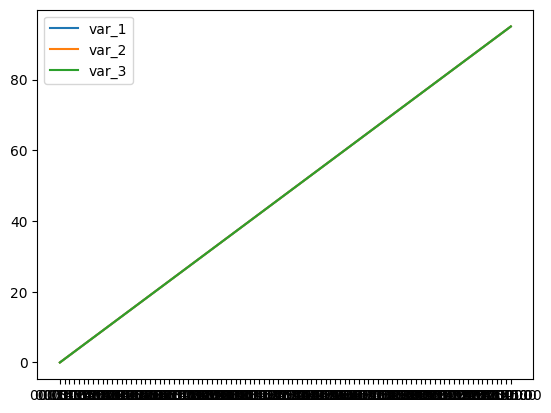

In [66]:
ax = df.plot(xticks=range(len(df)))

<AxesSubplot: >

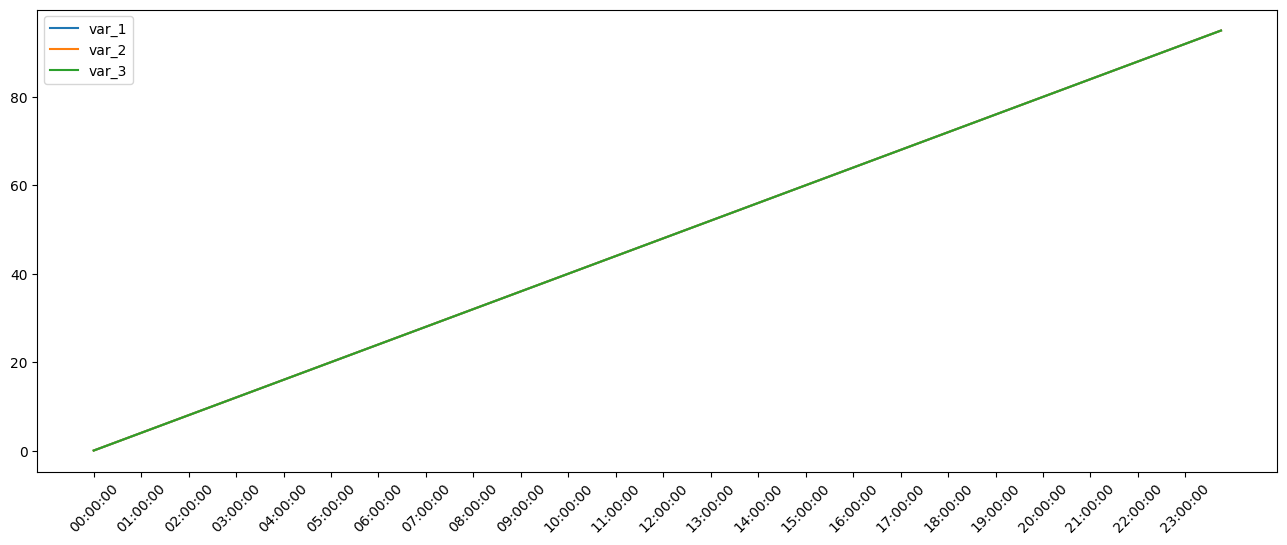

In [100]:
df = pd.DataFrame(data={'var_1': var_1, 'var_2': var_2, 'var_3': var_3}, index=original_indicies)
df.plot(xticks=range(0, len(df), 4), figsize=(16, 6),rot=45)

# remove the time values from the index and rename the column
#df = df.reset_index().rename({'index': 'time'}, axis=1)

# set the type of the time column
#df.time = df.time.apply(pd.Timestamp).dt.time

# plot
#ax = df.plot(x='time', figsize=(10, 6))
#xtcks = ax.get_xticks()


# Outstanding visualization

The following needs to be done for both P and Q. To save space, I can use dual axes to plot P and Q on the same graph like shown below.

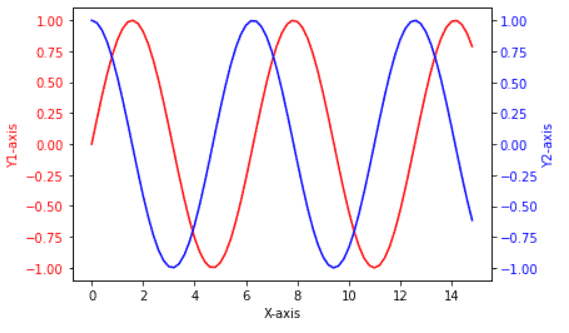

<ol>
    <li>A plot of all days overlayed onto each other, with sequential colorgrading, opposing color schemes for Jan and Feb</li>
    <li>A comparison of Barycenter for January and February vs the mean of January and February at every timestamp</li>
    <li>Produce plots for January and February</li>
</ol>